In [202]:

from PIL import Image
import scipy
import scipy.misc
import scipy.cluster
import numpy as np
from scipy.misc import imsave
import os
import matplotlib.pyplot as plt
#from IPython.display import Image
%matplotlib inline

In [208]:
def get_main_colors(image_folder, list_images_names, Nmain, NUM_CLUSTERS=7):    
    ar=[]
    for j in range(len(list_images_names)):
        im = Image.open(image_folder+list_images_names[j])
        im = im.resize((150, 150))      # optional, to reduce time
        ar1 = scipy.misc.fromimage(im)
        if list_images_names[j].find(".png")>=0:
            ar1=ar1[:,:,0:3]
        shape = ar1.shape
        ar1 = ar1.reshape(scipy.product(shape[:2]), shape[2])
        ar.append(ar1)
    ar=np.vstack(ar)
    
    codes, dist = scipy.cluster.vq.kmeans(ar.astype(float), NUM_CLUSTERS)
    
    vecs, dist = scipy.cluster.vq.vq(ar.astype(float), codes)         # assign codes
    counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences
        
    MainRepeated=counts.argsort()[-Nmain:][::-1]
    
    perc=100*counts[MainRepeated]/len(ar)
    
    colors_rep=[]
    for j in range(Nmain):
        colors_rep.append(codes[MainRepeated[j]].astype(int))
        
    #print(colors_rep, perc)
    
    return colors_rep, perc    
    

def generate_colormap(colors_rep, im_outputfile, size_img=[5,5]):
    for j in range(len(colors_rep)):
        img=np.zeros((size_img[0], size_img[1], 3))
        for k in range(3):
            img[:,:,k]=colors_rep[j][k]
        imsave(im_outputfile+str(j)+".jpg", img)
    


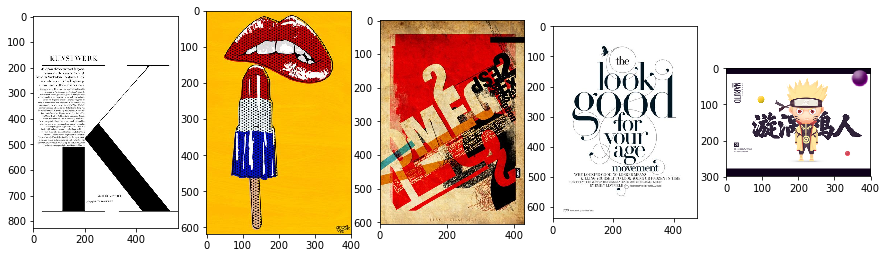

In [204]:
folder_images="./data/images2440/imgs/"

image_files_all=os.listdir(folder_images)


n_images=5
ncolors=3
image_files=[image_files_all[j] for j in range(10,n_images+10)]

plt.figure(figsize=(15,8))
for j in range(n_images):
    im = Image.open(folder_images+image_files[j])    
    plt.subplot(1,n_images,j+1)
    plt.imshow(np.asarray(im))


In [209]:
im_outputfile="./imagescolor_"

colors, perc=get_main_colors(folder_images, image_files, ncolors)
generate_colormap(colors, im_outputfile)

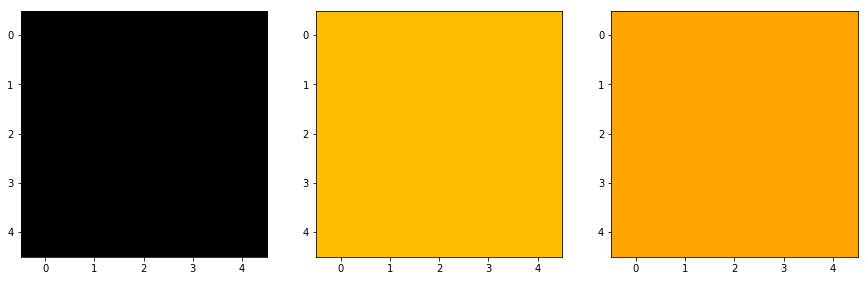

In [206]:
plt.figure(figsize=(15,8))


plt.figure(figsize=(15,8))
for j in range(ncolors):
    im = Image.open(im_outputfile+str(j)+".jpg")    
    plt.subplot(1,ncolors,j+1)
    plt.imshow(np.asarray(im))